<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/Regression_All_in_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression - All In One 
-------------------------------------------------------------------

1. This is a practice exercise where i will implement few regression methods

```

1. Simple Linear Regression  on Fuel Economy dataset
2. Multiple Linear Regresion
3. Polynomial regression
4. Ridge and Lasso Regression [ regularisation ]

```


> **dataset** [link](https://github.com/teddcp/Machine-Learning-/tree/master/data-files)


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#  Simple  Linear Regression 
--------------------------------------------------------------------------------

In [4]:
data=pd.read_csv('/content/FuelEconomy.csv')
data.head()

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [5]:
#renaming the columns
data.rename(columns={'Horse Power' : 'hp', 'Fuel Economy (MPG)' : 'mpg' },inplace=True)
data.head()

,hp,mpg
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [6]:
data.info()  # No Null value & No Categorical Variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hp      100 non-null    float64
 1   mpg     100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [7]:
data.describe()

,hp,mpg
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


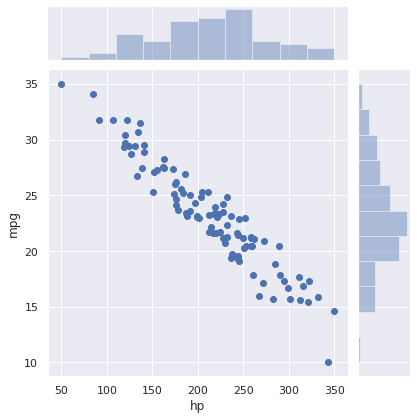

In [8]:
sns.jointplot(x='hp',y='mpg',data=data)   # Linear Relationship exists

In [0]:
#splitting the data
x=data[['hp']]
y=data['mpg']

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test= tts(x,y,test_size=0.3,random_state=42)

In [0]:
# Linear Regression model
from sklearn.linear_model import LinearRegression as lr

model=lr(fit_intercept=True)

In [12]:
#training
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# getting the coefficients and intercept
model.intercept_,model.coef_

(38.83895884102216, array([-0.0732172]))

In [0]:
# Predicting
res= model.predict(x_test)

In [0]:
# Evaluation of results : MSE, r2-score
from sklearn.metrics import mean_squared_error as mse, r2_score

In [17]:
np.sqrt(mse(y_test,res)), round(r2_score(y_test,res),2)   # RMSE and r2-score

(1.2941985825640643, 0.91)

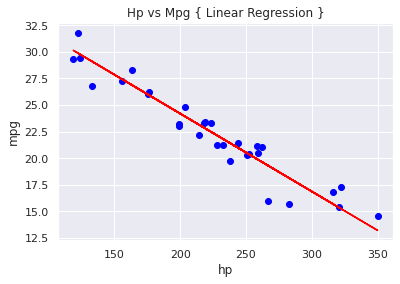

In [21]:
# Plotting the result
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,res,color='red')
plt.xlabel('hp')
plt.ylabel('mpg')
plt.title('Hp vs Mpg { Linear Regression }')
plt.show()

In [23]:
# Simple Prediction
hp=[[200]]
model.predict(hp)[0]

24.195519834652952

## Conclusion

We are able to achieve 91% r-squared value and RMSE is 1.3

# 2. Polynomial Regression
-------------------------------------------------------------------------------

In [59]:
data=pd.read_csv('/content/EconomiesOfScale.csv')
data.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [60]:
data.rename(columns={'Number of Units':'units','Manufacturing Cost':'cost'},inplace=True)
data.head()

,units,cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [61]:
data.info() # No Null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   units   1000 non-null   float64
 1   cost    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [62]:
data.describe()

,units,cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


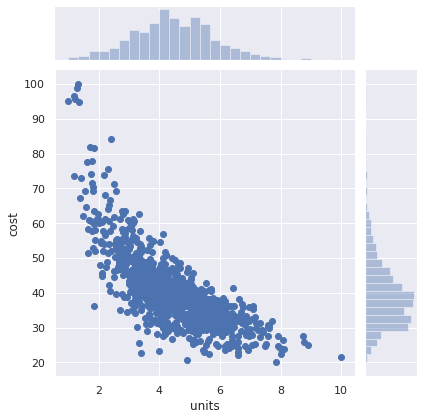

In [63]:
sns.jointplot(x='units',y='cost',data=data)

### Note

If we try to implement with linear Regression model, we can, but it will give a lower accuracy compared to a polynomial model.

In [0]:
# Splitting the data
x=data[['units']]
y=data['cost']

x_train,x_test,y_train,y_test= tts(x,y,test_size=0.3,random_state=42)

In [0]:
# making the model with pipeline

from sklearn.preprocessing import  PolynomialFeatures as pf
from sklearn.pipeline import make_pipeline as mp

In [91]:
model= mp(pf(degree=2  ,include_bias=False),lr(fit_intercept=True)) # A 2-degree polynomial
model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [92]:
#getting the coefficient and intercepts of the model  y= c+ bx + ax^2 i.e c,b,a
model.named_steps['linearregression'].coef_, model.named_steps['linearregression'].intercept_

(array([-17.53417038,   1.23618282]), 91.60864639950569)

In [0]:
res=model.predict(x_test)

In [94]:
np.sqrt(mse(y_test,res)), round(r2_score(y_test,res),2)   # RMSE and r2-score

(5.967373077831107, 0.66)

In [95]:
# sorting the the arrays to avoaid the messy plot
new_data=sorted(list(zip(x_test.to_numpy().ravel(),y_test.to_list())) , key=lambda x:(x[0],x[1]))
new_data= pd.DataFrame(new_data,columns=['a','b'])
new_data.head()

,a,b
0,1.191499,73.661311
1,1.204771,95.566843
2,1.307435,100.000000
3,1.379044,67.185383
4,1.473948,61.967696


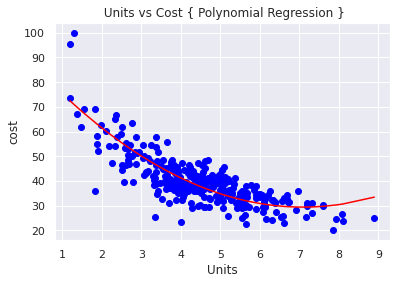

In [96]:
# Plotting the result
plt.scatter(new_data['a'],new_data['b'],color='blue')
plt.plot(new_data['a'],model.predict(new_data[['a']]),color='red')
plt.xlabel('Units')
plt.ylabel('cost')
plt.title(' Units vs Cost { Polynomial Regression }')
plt.show()

# Multiple Linear Regression
--------------------------------------------------------------------------------


In [99]:
data=pd.read_csv('/content/S&P500_Stock_Data.csv')
data.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [101]:
data.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764327
max,3.000000,70.000000,3000.000000


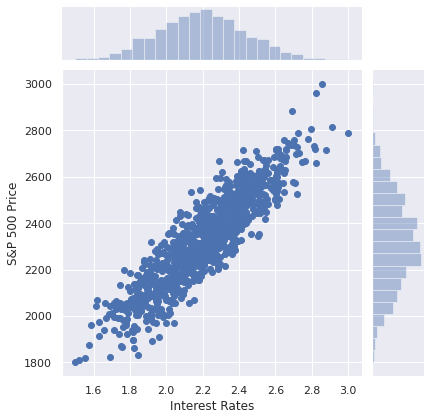

In [102]:
sns.jointplot(x='Interest Rates',y='S&P 500 Price',data=data)

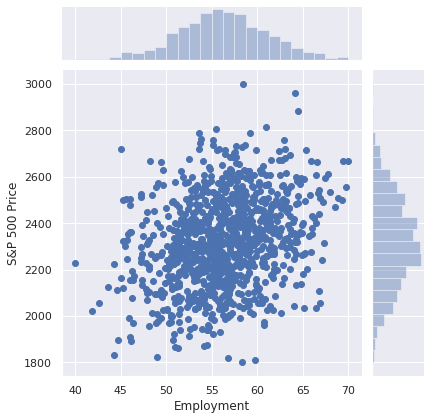

In [103]:
sns.jointplot(x='Employment',y='S&P 500 Price',data=data)

In [0]:
x=data[[ 'Interest Rates',	'Employment']]
y=data['S&P 500 Price']

x_train,x_test,y_train,y_test= tts(x,y,test_size=0.3,random_state=42)

In [106]:
# Multiple Linear Regression

model=lr(fit_intercept=True)

model.fit(x_train,y_train)

# getting the coefficients and intercepts
print(model.coef_,model.intercept_)

#predicting the res
res=model.predict(x_test)

# Accuracy Evaluation
np.sqrt(mse(y_test,res)), round(r2_score(y_test,res),2)

[729.27146997  12.16067424] 36.32483399720695


(59.92045465020651, 0.89)

In [112]:
# Multiple Polynomial Regression
model=mp(pf(degree=2,include_bias=False), lr(fit_intercept=True))

model.fit(x_train,y_train)

# getting the coefficients and intercepts
print(model.named_steps['linearregression'].coef_, model.named_steps['linearregression'].intercept_)

#predicting the res
res=model.predict(x_test)

# Accuracy Evaluation
np.sqrt(mse(y_test,res)), round(r2_score(y_test,res),2)

[ 8.55405981e+02  1.24781450e+01  2.27170302e+00 -2.42696573e+00
  4.47868227e-02] -112.5611881206828


(60.05400001627396, 0.89)

### Conclusion

From both the **multiple linear model and multiple polynomial model**, we can see that multiple linear model gives lower error and higher r2-score.



# Ridge Regression
--------------------------------------------------------------------------------

In [123]:
data=pd.read_csv('/content/S&P500_Stock_Data.csv')
data.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [125]:
data.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764327
max,3.000000,70.000000,3000.000000


In [0]:
x=data[[ 'Interest Rates',	'Employment']]
y=data['S&P 500 Price']

x_train,x_test,y_train,y_test= tts(x,y,test_size=0.3,random_state=42)

In [132]:
# Ridge Regression

from sklearn.linear_model import  Ridge as rr 

model=rr(alpha=1.0,fit_intercept=True)
model.fit(x_train,y_train)


#coeffiecients and intercepts
print(model.coef_,model.intercept_)

#Predicting 
res=model.predict(x_test)

# Accuracy Evaluation
np.sqrt(mse(y_test,res)), round(r2_score(y_test,res),2)

[712.15547705  12.17222954] 73.19170904554721


(59.93694339522874, 0.89)

In [137]:
# Hyperparameter Tuning for Ridge Regression
# RidgeCV

alphas=np.linspace(1,25,70)

from sklearn.linear_model import RidgeCV as rrcv

model= rrcv(alphas,fit_intercept=True,cv=5,scoring='neg_mean_squared_error')
model.fit(x_train,y_train)

#coeffiecients and intercepts
print(model.coef_,model.intercept_)

#Predicting 
res=model.predict(x_test)

# Accuracy Evaluation
np.sqrt(mse(y_test,res)), round(r2_score(y_test,res),2)

[712.15547705  12.17222954] 73.19170904554721


(59.93694339522874, 0.89)

# Lasso Regression
--------------------------------------------------------------------------

In [0]:
from sklearn.linear_model import Lasso,LassoCV

In [139]:
# Lasso Regression

model=Lasso(alpha=1.0,fit_intercept=True)
model.fit(x_train,y_train)


#coeffiecients and intercepts
print(model.coef_,model.intercept_)

#Predicting 
res=model.predict(x_test)

# Accuracy Evaluation
np.sqrt(mse(y_test,res)), round(r2_score(y_test,res),2)

[712.459494    12.13064999] 74.86928268307656


(59.938955374984744, 0.89)

In [142]:
# LAssoCV 
# Hyper-parameter Tuning

alphas=np.linspace(1,25,70)

model= LassoCV(alphas=alphas,fit_intercept=True,cv=5)
model.fit(x_train,y_train)

#coeffiecients and intercepts
print(model.coef_,model.intercept_)

#Predicting 
res=model.predict(x_test)

# Accuracy Evaluation
np.sqrt(mse(y_test,res)), round(r2_score(y_test,res),2)

[712.459494    12.13064999] 74.86928268307656


(59.938955374984744, 0.89)

# Elasticnet Regression
-----------------------------------------------------------------
https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn

In [0]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [144]:
# ElasticNet Regression

model=ElasticNet(alpha=1.0,fit_intercept=True)
model.fit(x_train,y_train)


#coeffiecients and intercepts
print(model.coef_,model.intercept_)

#Predicting 
res=model.predict(x_test)

# Accuracy Evaluation
np.sqrt(mse(y_test,res)), round(r2_score(y_test,res),2)

[76.59774661 12.34828017] 1456.4107816016376


(163.7889756856553, 0.2)

In [147]:
#  ElasticnetCV Regression
# HyperPARAMETER Tuning

alphas=np.linspace(1,25,70)

model=ElasticNetCV(alphas=alphas,fit_intercept=True,n_jobs=-1,cv=10)
model.fit(x_train,y_train)


#coeffiecients and intercepts
print(model.coef_,model.intercept_)

#Predicting 
res=model.predict(x_test)

# Accuracy Evaluation
np.sqrt(mse(y_test,res)), round(r2_score(y_test,res),2)

[76.59774661 12.34828017] 1456.4107816016376


(163.7889756856553, 0.2)